In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import nltk
import yelp_utils
from yelp_utils import *
#for plots to be in ipython notebook
%matplotlib inline 
# pd.options.display.mpl_style = 'default'

pd.set_option('display.max_columns', 36)
print "Pandas version: " + pd.__version__

C:\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Pandas version: 0.17.0


In [3]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
print "Plotly version: "+ plotly.__version__
# plotly.offline.init_notebook_mode()

Plotly version: 1.12.1


In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print __version__ # requires version >= 1.9.0
init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

1.12.1


In [5]:
read_filename = os.path.join(yelp_utils.YELP_DATA_CSV_DIR, 'business_review_user'+ yelp_utils.data_subset + '.csv')
df_data = pd.read_csv(read_filename, engine='c', encoding='utf-8')

In [6]:
df_data.shape

(2193, 30)

In [7]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329']) # 1, 2, 3, 4, and 5 stars respectively

In [8]:
#stars_labels = np.array([x_stars+1 for x_stars in range(N_star_categories)])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df_data.review_stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))

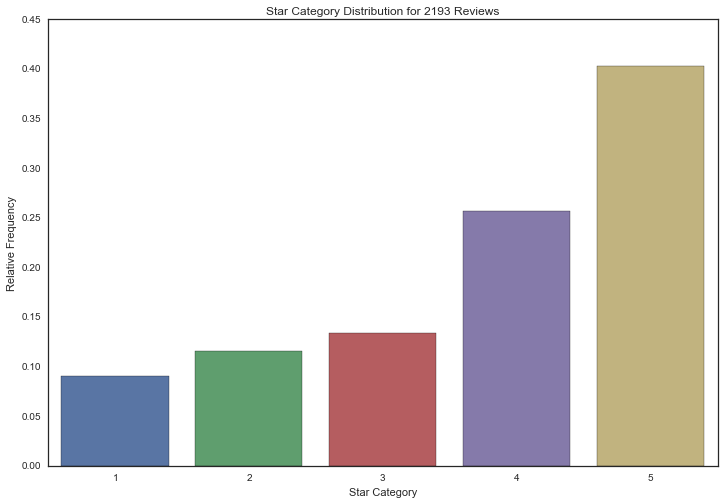

In [9]:
# Seaborn example
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df_data)));

In [10]:
# Plotly example
plotly.offline.iplot_mpl(fig2)

In [11]:
from wordcloud import WordCloud

In [12]:
def plot_word_cloud(data):
    '''
    Function to plot word cloud from a pandas series
    Input: data: pandas.core.series.Series object
    Output: Wordcloud of most recurrent words in data
        for plots to be in ipython notebook include following line before calling this function
        %matplotlib inline 
    '''
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [13]:
type(df_data["review_text"].loc[df_data.review_stars == 1, ])

pandas.core.series.Series

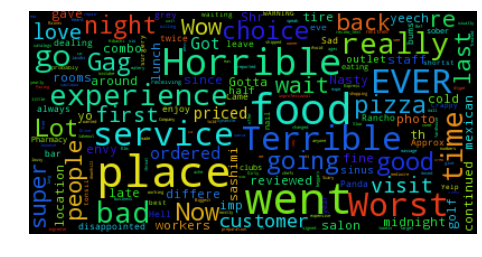

In [14]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 1, ])

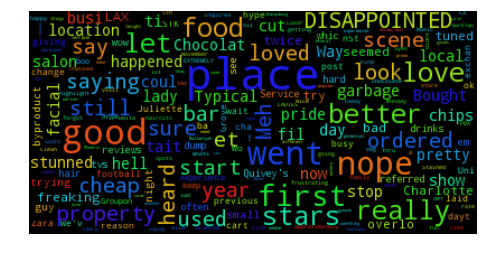

In [15]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 2, ])

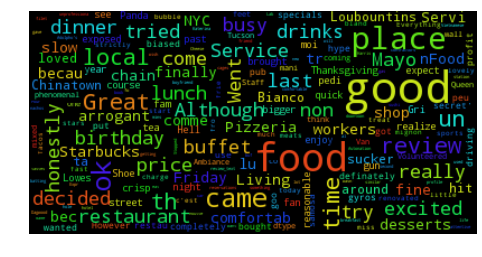

In [16]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 3, ])

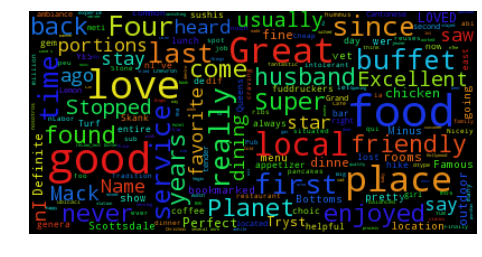

In [17]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 4, ])

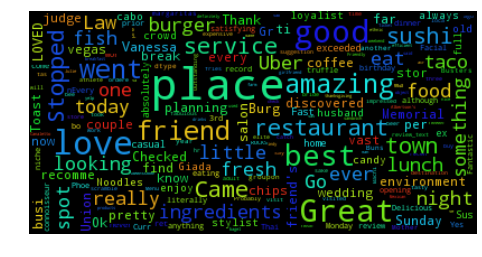

In [18]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 5, ])

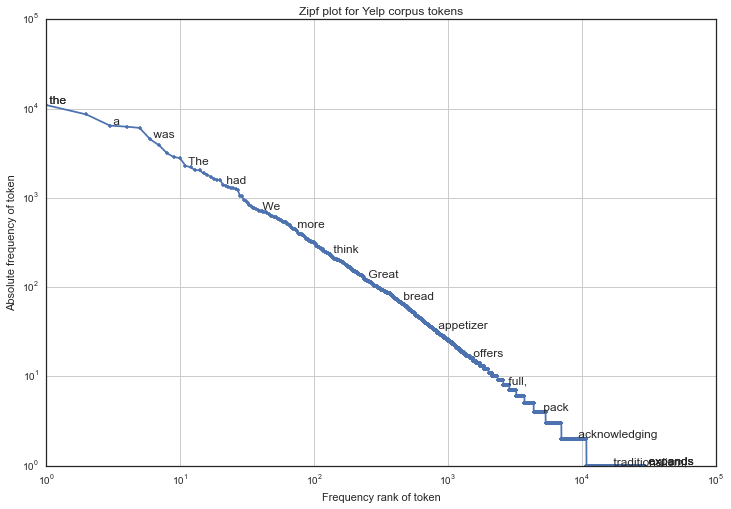

In [19]:
yelp_review_tokens = df_data.review_text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
yelp_review_vocabulary_counts = np.array(yelp_review_vocabulary.values())
yelp_review_vocabulary_tokens = yelp_review_vocabulary.keys()

# A Zipf plot
ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
indices = np.argsort(-yelp_review_vocabulary_counts)
frequencies = yelp_review_vocabulary_counts[indices]
fig3 = plt.figure(figsize=(12, 8))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf plot for Yelp corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid(True)
for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
    dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

# show()

In [20]:
plotly.offline.iplot_mpl(fig3)

<b> I see that Yelp data is also following the Zipfs law and giving straight line, indicating tfidf vectorizer can be used for better performance for finding the cut offs </b>

In [21]:
tokens_sorted =  []
i =0;
for tok in yelp_review_vocabulary_tokens:
    tokens_sorted.append(yelp_review_vocabulary_tokens[indices[i]])
    i = i + 1

In [22]:
# Interactive plot for frequency VS rank
trace0 = go.Scatter(
    x = ranks,
    y = frequencies,
    text = tokens_sorted,
    mode='markers',
    marker=dict(size=4,
                line=dict(width=1)
               )
)

# Code for loglog plot
# layout = go.Layout(
#     title='Zipf`s plot for Yelp corpus',
#     hovermode='closest',
#     xaxis=dict(
#         title='Frequency rank of token',
#         type='log',
#         autorange=True
#     ),
#     yaxis=dict(
#         title='Absolute frequency of token',
#         type='log',
#         autorange=True
#     )
# )

layout = go.Layout(
    title='Frequency vs Rank for a sample of yelp review dataset',
    hovermode='closest',
    xaxis=dict(
        title='Rank of words',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Frequency of word',
        ticklen=5,
        gridwidth=2,
    ),
)
fig4 = go.Figure(data=[trace0], layout=layout)
plotly.offline.iplot(fig4)
# py.iplot(fig, filename='Yelp word frequency vs rank')